# `NumericalSgps` an introduction - Lisbon 2022

## Some basic definitions

Recall that a numerical semigroup $S$ is a subset of the set of nonnegative integers, $\mathbb{N}$, that is closed under addition, $0\in S$, and there are only finitely many positive integers not belonging to $S$. The first two contidions imply that $(S,+)$ is a submonoid of $(\mathbb{N},+)$. 

The set $\mathbb{N}\setminus S$ is known as the set of gaps of $S$, denoted $\operatorname{G}(S)$, and the largest integer not belonging to $S$ is its Frobenius number, $\operatorname{F}(S)$. The conductor of $S$, $\operatorname{C}(S)$ has the following property: $\operatorname{C}(S)+\mathbb{N}\subseteq S$.

In [ ]:
LoadPackage("num");

true

In [2]:
s:=NumericalSemigroupByGaps([1..5]);

Numerical semigroup

In [3]:
10 in s;

true

In [4]:
FrobeniusNumber(s);

5

In [5]:
Gaps(s);

[ 1, 2, 3, 4, 5 ]

We can see which elements in the semigroup are in a given interval.

In [6]:
Intersection(s,[0..30]);

[ 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30 ]

Or which is the $i$th element in the semigroup.

In [7]:
s[30];

34

Or even, what are the first $n$ elements in the semigroup.

In [8]:
s{[1..20]};

[ 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24 ]

The genus of $S$ is the cardinality of $\mathbb{N}\setminus S$, denoted $\operatorname{g}(S)$.

In [9]:
Genus(s);

5

The set $S\cap[0,\operatorname{C}(S)]$ is known as the set of small elements of $S$ (if we remove the conductor, then somtimes is called the set of left or sporadic elements).

In [10]:
SmallElements(s);

[ 0, 6 ]

In [11]:
s=NumericalSemigroupBySmallElements([0,6]);

true

Denote by $\operatorname{n}(S)=\#\{s \in S : s<\operatorname{F}(S)\}$. It follows that $\operatorname{n}(S)+\operatorname{g}(S)=\operatorname{F}(S)+1$. Since for every $n\in S$ with $n<\operatorname{F}(S)$ we have that $\operatorname{F}(S)-n\not\in S$, we have that there are less left elements than gaps, and so the following inequality always holds.

In [12]:
Genus(s)>= (FrobeniusNumber(s)+1)/2;

true

Given $A$ a set of positive integers, the submonoid (under addition) of $\mathbb{N}$ generated by $A$ is the intersection of all submonoids of $\mathbb{N}$ contanining $A$, which can be described as 
$$ \langle A\rangle = \left\{ \sum_{i=1}^n \lambda_i a_i : n\in\mathbb{N}, \lambda_i\in \mathbb{N}, a_i\in A\right\}.$$
The submonoid $\langle A\rangle$ is a numerical semigroup if and only if $\gcd(A)=1$.

We say that $A$ is a generating system of $S$ if $S=\langle A\rangle$, and that $A$ is a minimal generating system of $S$ if, in addition, no proper subset of $A$ generates $S$. 

Every numerical semgiroup has a unique minimal generating system: $S^*\setminus (S^*+S^*)$, with $S^*=S\setminus\{0\}$. Sometimes the elements in the minimal generating system of $S$ are called minimal generators, atoms, irreducible, or primitive elements of $S$. The cardinality of the minimal generating system of $S$ is known as the embedding dimension of $S$, denoted $\operatorname{e}(S)$.

In [13]:
Generators(s);

[ 6, 7, 8, 9, 10, 11 ]

In [14]:
MinimalGenerators(s);

[ 6, 7, 8, 9, 10, 11 ]

In [15]:
EmbeddingDimension(s);

6

We can define a numerical semigoup by giving one of its generating sets.

In [16]:
s:=NumericalSemigroup(3,5,7);

Numerical semigroup with 3 generators

The multiplicity of a numerical semigroup $S$ is the least positive integer in $S$ (and coincides with its smallest minimal generator), we will denote it by $\operatorname{m}(S)$.

In [17]:
Multiplicity(s);

3

## Apéry sets

One of the most important tools when studying numerical semigroups is the concept of Apéry sets. Given a numerical semigroup $S$ and $n$ a nonzero element of $S$ (one can define also Apéry sets for elements outside $S$, but we are not going to deal with them here), the Apéry set of $n$ in $S$ (or of $S$ with respect to $n$) is the set 
$$\operatorname{Ap}(S,n)=\{ s\in S : s-n\not\in S\}.$$
This set has precisely $n$ elements, one in each congruence class modulo $n$. Moreover, for every $s\in S$ there exist unique $k\in \mathbb{N}$ and $w\in \operatorname{Ap}(S,n)$ such that $s=kn+w$. This in particular implies that the embedding dimension of $S$ is always smaller than or equal to its multiplicity, since $(\operatorname{Ap}(S,n))\setminus\{0\}\cup\{n\}$ is a minimal generating set of $S$ for all $n\in S\setminus\{0\}$.

In [19]:
s:=NumericalSemigroup(6,10,15);;
AperyList(s,12);

[ 0, 25, 26, 15, 16, 41, 6, 31, 20, 21, 10, 35 ]

If the second argument is not given, then the Apéry set is taken with respect to the multiplicity of the numerical semigroup.

In [20]:
AperyList(s);

[ 0, 25, 20, 15, 10, 35 ]

The output is arranged in a list, so that in the $i$th position (starting in 0) we find the least element in $S$ congruent with $i$ modulo $n$. In this way, membership to $S$ becomes trivial once an Apéry set of the semigroup is known. 

This has some other interesting consequences:

In [21]:
FrobeniusNumber(s)=Maximum(AperyList(s,12))-12;

true

In [22]:
Genus(s)=(Sum(AperyList(s,12)))/12- (12-1)/2;

true

Let $m$ be the multiplcity of $S$, and let $w_i$ be the element in the Apéry set of $m$ in $S$ congruent with $i$ modulo $m$. We can write $w_i=k_im+i$. The tuple $(k_1,\dots,k_{m-1})$ is known as the Kunz coordinates of $S$. 

In [23]:
KunzCoordinates(s);

[ 4, 3, 2, 1, 5 ]

Notice that every nonnegative integer $x$ can be written as $x=k m+i$ for some $k,n\in \mathbb{N}$, with $i<m$. It follows easily that $x\in S$ if and only if $k\ge k_i$. So it is at no surprise that the genus is precisely the sum of the Kunz coordinates of $S$, which is just a reformulation of the above statement on the genus.    

In [24]:
Genus(s)=Sum(KunzCoordinates(s));

true

Notice that $w_i+w_j\in S$ for all $i,j$, and thus $w_i+w_j=k_{ij}m+w_{i+j \bmod n}$, this imposes some conditions on the tuples $(k_1,\dots,k_{m-1})$ that can be Kunz coordinates of a numerical semigroup with multiplicity $m$. In fact, there is a one to one correspondence between numerical semigroups with multiplicity $m$ and integers points in what it is called the Kunz polyhedron.

In [25]:
KunzPolytope(6);

[ [ 1, 0, 0, 0, 0, -1 ], [ 0, 1, 0, 0, 0, -1 ], [ 0, 0, 1, 0, 0, -1 ], [ 0, 0, 0, 1, 0, -1 ], [ 0, 0, 0, 0, 1, -1 ], [ 2, -1, 0, 0, 0, 0 ], [ 1, 1, -1, 0, 0, 0 ], [ 1, 0, 1, -1, 0, 0 ], [ 1, 0, 0, 1, -1, 0 ], [ 0, 2, 0, -1, 0, 0 ], [ 0, 1, 1, 0, -1, 0 ], [ -1, 1, 0, 0, 1, 1 ], [ -1, 0, 1, 1, 0, 1 ], [ 0, -1, 1, 0, 1, 1 ], [ 0, -1, 0, 2, 0, 1 ], [ 0, 0, -1, 1, 1, 1 ], [ 0, 0, 0, -1, 2, 1 ] ]

The first elements of this output mean that $x_i\ge 1$, while for instance $[ 1, 0, 1, -1, 0, 0 ]$ translates to $x_1+x_3\ge x_4$, and $ [ 0, 0, 0, -1, 2, 1 ]$ to $2x_5+1\ge x_4$.

In [27]:
x:=List([1..5],i->Indeterminate(Rationals,i));;
x1:=Concatenation(x,[1]);;

In [28]:
for eq in KunzPolytope(6) do Print(eq*x1," ≥ 0\n"); od;

x_1-1 ≥ 0
x_2-1 ≥ 0
x_3-1 ≥ 0
x_4-1 ≥ 0
x_5-1 ≥ 0
2*x_1-x_2 ≥ 0
x_1+x_2-x_3 ≥ 0
x_1+x_3-x_4 ≥ 0
x_1+x_4-x_5 ≥ 0
2*x_2-x_4 ≥ 0
x_2+x_3-x_5 ≥ 0
-x_1+x_2+x_5+1 ≥ 0
-x_1+x_3+x_4+1 ≥ 0
-x_2+x_3+x_5+1 ≥ 0
-x_2+2*x_4+1 ≥ 0
-x_3+x_4+x_5+1 ≥ 0
-x_4+2*x_5+1 ≥ 0


# Pseudo-Frobenius numbers and type

Let $S$ be a numerical semigroup. A pseudo-Frobenius number is an integer $f$ such that $f+S^*\subseteq S$. In particular, the Frobenius number of $S$ is a pseudo-Frobenius number. The cardinality of the set of pseudo-Frobenius numbers of $S$, $\operatorname{FP}(S)$, is known as the type of $S$.

The semigroup $S$ induces the following ordering over the integers: $a \le_S b$ if $b-a\in S$. It easily follows that 
$$ \operatorname{PF}(S)= \operatorname{Maximals}_{\le_S}(\mathbb{N}\setminus S).$$

In [29]:
s:=NumericalSemigroup(6,11,13,21);

Numerical semigroup with 4 generators

In [30]:
PseudoFrobenius(s);

[ 15, 16, 20 ]

In [31]:
Type(s);

3

Is is not difficult to prove that for any $n\in S\setminus\{0\}$,  $$n+\operatorname{PF}(S)=\operatorname{Maximals}_{\le_S}(\operatorname{Ap}(S,n)).$$

In [32]:
rap:=HasseDiagramOfAperyListOfNumericalSemigroup(s);

<object>

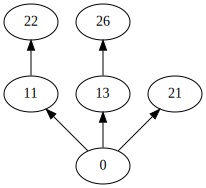

In [33]:
JupyterSplashDot(DotBinaryRelation(rap));

In [34]:
6+PseudoFrobenius(s);

[ 21, 22, 26 ]

The minimal elements in $S\setminus\{0\}$ with respect to $\le_S$ are precisely the minimal generators of $S$.

For every element $n\in S\cap[0,\operatorname{F}(S))\cup (\operatorname{PF}(S)\setminus\{\operatorname{F}(S)\})$, we have that $\operatorname{F}(S)-n$ is a gap of $S$. Thus $\operatorname{n}(S)+\operatorname{t}(S)-1\le \operatorname{g}(S)$. By combining this with $\operatorname{n}(S)+\operatorname{g}(S)=\operatorname{F}(S)+1$, we obtain
$$
\operatorname{g}(S)\ge \frac{\operatorname{F}(S)+\operatorname{t}(S)}2.
$$

In [35]:
Genus(s);

13

In [36]:
(FrobeniusNumber(s)+Type(s))/2;

23/2

## Duality minimal generators  and special gaps

Notice that for a given numerical semigroup $S$, an element $n\in S$ is a minimal generator if and only if $S\setminus\{n\}$ is also a numerical semigroup (which has one more gap than $S$). Starting with $\mathbb{N}$, by removing minimal generators we can construct all numerical semigroups with a given genus.

In [41]:
c:=Union(List([0..4],i->NumericalSemigroupsWithGenus(i)));;
cc:=Filtered(Cartesian(c,c),p->IsSubset(p[2],p[1]) and IsSubset(MinimalGenerators(p[2]),Difference(p[2],p[1])) 
                                and Length(Difference(p[2],p[1]))=1);;
d:=Domain(List(c,MinimalGenerators));;
pairs:=List(cc,p->Tuple([MinimalGenerators(p[1]),MinimalGenerators(p[2])]));;
br:=BinaryRelationByElements(d,pairs);

<object>

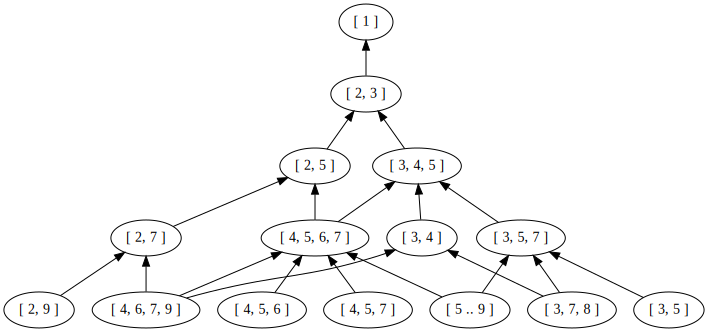

In [42]:
JupyterSplashDot(DotBinaryRelation(br));

For any numerical semigroup $S$ (other than $\mathbb{N}$), the set $T=S\cup\{\operatorname{F}(S)\}$ is also a numerical semigroup. The semigroup $S$ is obtained from $T$ by removing a minimal generator larger than its Frobenius number.

So if we remove minimal generators larger than the Frobenius number, we still obtain the same numerical semigroups, but the above directed graph becomes a tree.

In [45]:
cc:=Filtered(Cartesian(c,c),p->IsSubset(p[2],p[1]) and Difference(p[2],p[1])=[FrobeniusNumber(p[1])]);;
pairs:=List(cc,p->Tuple([MinimalGenerators(p[1]),MinimalGenerators(p[2])]));;
br:=BinaryRelationByElements(d,pairs);

<object>

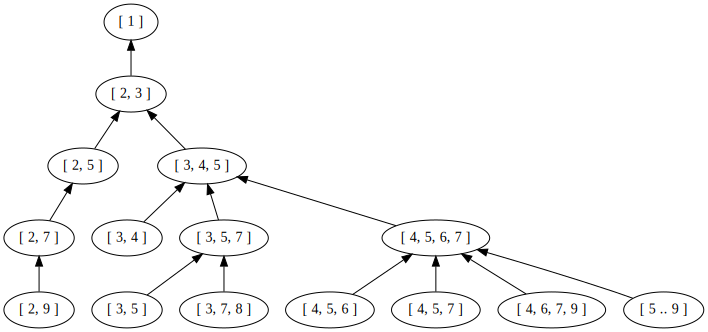

In [46]:
JupyterSplashDot(DotBinaryRelation(br));

Now let us think about the dual process: what are the gaps that I may add to a numerical semigroup in order to obtain a nuew numerical semigroup. We already know that we can always add the Frobenius number, but we may have some other options. Let $S$ be a numerical semigroup and let $f$ be a gap of $S$. As we want $S\cup \{f\}$ to be a numerical semigroup, $f+S\subseteq S\cup\{f\}$, and consequently $f$ must be in $\operatorname{PF}(S)$. But also $kf \in S\cup\{f\}$ for every positive integer $k$. This means that $2f, 3f\in S$. The set of gaps having these properties are known as special gaps.
$$
\operatorname{SG}(S)=\{ g\in \operatorname{PF}(S) : 2g\in S, 3g\in S\}.
$$

In [47]:
s:=NumericalSemigroup(4,7,9,10);;

In [48]:
SpecialGaps(s);

[ 5, 6 ]

If we keep adding special gaps to our semigroup and the resulting semigroups, we will obtain the set of all oversemigroups of the given numerical semigroup.

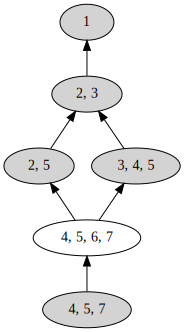

In [50]:
s:=NumericalSemigroup(4,5,7);;
JupyterSplashDot(DotOverSemigroups(s));

## When some bounds are attained

### Numerical semigroups with maximal embedding dimension

We have already seen that the embedding dimension of a numerical semigroup is always less than or equal to the multiplicity. We say that a numerical semigroup $S$ has maximal embedding dimension if $\operatorname{m}(S)=\operatorname{e}(S)$.

In [51]:
s:=NumericalSemigroup(3,5,7);;

In [52]:
IsMED(s);

true

A numerical semigroup $S$ is of maximal embedding dimension if and only if $(S\setminus\{0\})-\operatorname{m}(S)$ is a numerical semigroup, or equivalently, for any $x,y\in S$ with $x\ge y \ge \operatorname{m}(S)$, we have $x+y-\operatorname{m}(S)\in S$.

It turns out that the intersecction of two maximal embedding dimension numerical semigroups is again of maximal embedding dimension, and thus we can think about a maximal embedding dimension closure.

In [53]:
s:=NumericalSemigroup(3,5);;

In [54]:
MinimalGenerators(MEDClosure(s));

[ 3, 5, 7 ]

It also makes sense to talk abot the minimal generators as a numerical semigroup with maximal embedding dimension. An element $a$ in a numerical semigroup $S$ with maximal embedding dimension, with $a>\operatorname{m}(S)$, will be in that minimal MED generating system if and only if $S\setminus\{a\}$ is again a numerical semigroup with maximal embedding dimension. 

In [55]:
MinimalMEDGeneratingSystemOfMEDNumericalSemigroup(NumericalSemigroup(3,5,7));

[ 3, 5 ]

In [56]:
t:=RemoveMinimalGeneratorFromNumericalSemigroup(5,s);

Numerical semigroup with 3 generators

In [57]:
MinimalGenerators(t);

[ 3, 8, 10 ]

In [58]:
IsMED(t);

true

If $S=\langle m=n_1< n_2< \dots < n_m\rangle$ is a numerical semigroup with maximal embedding dimension, then $\operatorname{Ap}(S,m)=\{0, n_2, \dots, n_m\}$, and thus $\operatorname{t}(S)=m-1$. It is not hard to prove that $S$ has maximal embedding dimension if and only if it has maximal type.

In [59]:
Type(NumericalSemigroup(3,5,7));

2

A particular class of numerical semigroups with maximal embedding dimension is that of Arf numerical semigroups. A numerical semigroup $S$ if Arf if for any $x,y,z\in S$, with $x\ge y\ge z$, one gets $x+y-z\in S$. Clearly, the intersection of two Arf numerical semigroups is again an Arf numerical semigroup.

In [60]:
MinimalGenerators(ArfNumericalSemigroupClosure(NumericalSemigroup(3,5)));

[ 3, 5, 7 ]

### Irreducible numerical semigroups

We say that a numerical semigroup $S$ is irreducible if it cannot be expressed as the intersection of two numerical semigroups properly containing it.

It can be (easily) shown that if we fix a positive integer $f$, then $S$ is irreducible if and only if it is maximal (with respect to inclusion) in the set of all numerical semigroups with Frobenius number $f$ (or equivalently, in the set of all numerical semigroups not containing $f$). 

Recall that $\operatorname{g}(S)\ge (\operatorname{F}(S)+1)/2$. Having less genus means being "bigger", and so if $\operatorname{F}(S)$ is odd, then $S$ is irreducible if and only if $\operatorname{g}(S)= (\operatorname{F}(S)+1)/2$.

For $\operatorname{F}(S)$ even, we obtain that $S$ is irreducible if and only if $\operatorname{g}(S)=(\operatorname{F}(S)+2)/2$.



Every numerical semigroup can be expressed as a finite intersection of irreducible numerical semigroups. Two minimal (non-redundant) expressions of the semigroup as intersection of irreducible numerical semigroup may have different factors.

In [61]:
s:=NumericalSemigroup(3,7,8);

Numerical semigroup with 3 generators

In [62]:
SmallElements(s);

[ 0, 3, 6 ]

In [63]:
IsIrreducible(s);

false

In [64]:
l:=DecomposeIntoIrreducibles(s);

[ Numerical semigroup with 2 generators, Numerical semigroup with 3 generators ]

In [65]:
List(l,SmallElements);

[ [ 0, 3, 4, 6 ], [ 0, 3, 5 ] ]

Notice also that for every integer $x$, both $x$ and $\operatorname{F}(S)-x$ cannot be in $S$ (since otherwise their sum, which is $\operatorname{F}(S)$, would be in $S$). If we want $S$ to have the least possible number of gaps once the Frobenius number is fixed, then we do not want $x$ and $\operatorname{F}(S)-x$ to be gaps at the same time (unless they are the same and then $x=\operatorname{F}(S)/2$). 

Assume that $\operatorname{F}(S)$ is odd. Then we say that $S$ is symmetric if for any integer $x\not\in S$, we have that $\operatorname{F}(S)-x\in S$. A numerical semigroup with odd Frobenius number is irreducible if and only if it is symmetric.

For the case $\operatorname{F}(S)$ even, we have to take into account $\operatorname{F}(S)/2$. A numerical semigroup $S$ is pseudo-symmetric if $\operatorname{F}(S)$ is even and for any integer $x$ not in $S$ and different from $\operatorname{F}(S)/2$, we have that $\operatorname{F}(S)-x\in S$. A numerical semigroup with even Frobenius number is irreducible if and only if it is pseudo-symmetric.

In [66]:
PseudoFrobenius(s);

[ 4, 5 ]

In [67]:
li:=IrreducibleNumericalSemigroupsWithFrobeniusNumber(13);

[ Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup ]

In [68]:
List(li,PseudoFrobenius);

[ [ 13 ], [ 13 ], [ 13 ], [ 13 ], [ 13 ], [ 13 ], [ 13 ], [ 13 ] ]

In [69]:
li:=IrreducibleNumericalSemigroupsWithFrobeniusNumber(14);

[ Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup ]

In [70]:
List(li,PseudoFrobenius);

[ [ 7, 14 ], [ 7, 14 ], [ 7, 14 ], [ 7, 14 ], [ 7, 14 ], [ 7, 14 ] ]

Symmetric numerical semigroups correspond with those numerical semigroups of type one, while $S$ is pseudo-symmetric if and only if $\operatorname{PF}(S)=\{\operatorname{F}(S)/2, \operatorname{F}(S)\}$. As we have seen above, there are numerical semigroups with type two that are not pseudo-symmetric.

In [71]:
LoadPackage("jupyterviz");

true

In [72]:
li:=List([1..25], i->[i,Length(IrreducibleNumericalSemigroupsWithFrobeniusNumber(i))]);

[ [ 1, 1 ], [ 2, 1 ], [ 3, 1 ], [ 4, 1 ], [ 5, 2 ], [ 6, 1 ], [ 7, 3 ], [ 8, 2 ], [ 9, 3 ], [ 10, 3 ], [ 11, 6 ], [ 12, 2 ], [ 13, 8 ], [ 14, 6 ], [ 15, 7 ], [ 16, 7 ], [ 17, 15 ], [ 18, 7 ], [ 19, 20 ], [ 20, 11 ], [ 21, 18 ], [ 22, 20 ], [ 23, 36 ], [ 24, 14 ], [ 25, 44 ] ]

In [73]:
Plot(li);

### Almost symmetric numerical semigroups

Recall that for a numerical semigroup $S$, $\operatorname{g}(S)\ge (\operatorname{F}(S)+\operatorname{t}(S))/2$. We say that $S$ is almost symmetric if $\operatorname{g}(S)= (\operatorname{F}(S)+\operatorname{t}(S))/2$. Consequently, these are numerical semigroups maximal with respect to inclusion once the type and the Frobenius number are fixed. 

Clearly, every irreducible numerical semigroup is almost symmetric.

In [75]:
s:=NumericalSemigroup(3,7,8);;
IsAlmostSymmetric(s);

false

In [76]:
FrobeniusNumber(s);

5

In [77]:
la:=AlmostSymmetricNumericalSemigroupsWithFrobeniusNumber(5);

[ Numerical semigroup, Numerical semigroup, Numerical semigroup, Numerical semigroup ]

In [78]:
List(la,SmallElements);

[ [ 0, 6 ], [ 0, 4, 6 ], [ 0, 2, 4, 6 ], [ 0, 3, 4, 6 ] ]

In [79]:
SmallElements(s);

[ 0, 3, 6 ]

In [80]:
li:=List([1..25], i->[i,Length(AlmostSymmetricNumericalSemigroupsWithFrobeniusNumber(i))]);

[ [ 1, 1 ], [ 2, 1 ], [ 3, 2 ], [ 4, 2 ], [ 5, 4 ], [ 6, 3 ], [ 7, 7 ], [ 8, 6 ], [ 9, 11 ], [ 10, 9 ], [ 11, 20 ], [ 12, 15 ], [ 13, 32 ], [ 14, 24 ], [ 15, 47 ], [ 16, 42 ], [ 17, 83 ], [ 18, 58 ], [ 19, 131 ], [ 20, 103 ], [ 21, 188 ], [ 22, 151 ], [ 23, 323 ], [ 24, 241 ], [ 25, 494 ] ]

In [81]:
Plot(li);

There are many other generalizations of symmetry.

## Minimal presentations

In mathematics many algebraic objects are given by means of (free) generators and some relations among them. For numerical semigroups it is sometimes useful to have representation of this form.

Let $S$ be a numerical semigroup minimally generated by $\{n_1,\dots,n_e\}$. Every element $s\in S$ admits an expression of the form $s=a_1n_1+\dots+ a_e n_e$, and for every $(a_1,\dots,a_e)\in \mathbb{N}^e$, the integer $a_1n_1+\dots+a_en_e\in S$. Thus, the following (monoid) morphism 
$$
\varphi_S: \mathbb{N}^e \to S,\ \varphi_S(a_1,\dots,a_e)=a_1n_1+\dots+a_en_e
$$
is surjective. There is an isomorphism theorem for monoids, and consequently we have that $\mathbb{N}^e/\ker \varphi_S$ is isomorphic to $S$ as a monoid, where $\ker \phi_S=\{ (a,b)\in \mathbb{N}^e : \varphi_S(a)=\varphi_S(b)\}$. As a congruence, $\ker \varphi_S$ admints a system of generators, which is known as a presentation for $S$. 

A minimal presentation for $S$ is just a minimal generating system of $\ker \varphi_S$.

In [82]:
s:=NumericalSemigroup(2,3);

Numerical semigroup with 2 generators

In [83]:
MinimalPresentation(s);

[ [ [ 0, 2 ], [ 3, 0 ] ] ]

Thus $\langle 2,3\rangle$ can be viewed as the monoid generated by $a$ and $b$, which fulfil the relation $3a=2b$. 

Given $s\in S$, the set $\varphi_S^{-1}(s)$ corresponds to all the expressions that $s$ migh have in terms of the minimal generators of $S$. We will call this set, the set of factorizations of $s$, and we will denote it by $\mathsf{Z}(s)$.

In [84]:
Factorizations(6,s);

[ [ 3, 0 ], [ 0, 2 ] ]

In [85]:
Factorizations(20,s);

[ [ 10, 0 ], [ 7, 2 ], [ 4, 4 ], [ 1, 6 ] ]

A set $\rho$ generates a congruence $\sigma$ on $\mathbb{N}^e$ if for any pair $(a,b)\in \sigma$ there exists a chain $a_1,\dots,a_n$ such that

- $a_1=a$, $a_n=b$,
- for all $i$, there exists $c_i\in \mathbb{N}^e$ and $(\alpha_i,\beta_i)$ such that $(a_i,a_{i+1})=(\alpha_i+c_i,\beta_i+c_i)$ and either $(\alpha_i,\beta_i)\in \rho$ or $(\beta_i,\alpha_i)\in \rho$.

You can see the sequence $a_1,\dots,a_n$ as a chain of transformations from $a$ to $b$, and at each step we are applying a relation (or trade) chanbe $\alpha_i$ by $\beta_i$ (or viceversa). 

For instance, in the above example $((10,0),(1,6))\in \ker\varphi_S$. We start with $(10,0)$ and apply the only minimal relation we have on our numerical semigroup: $((10,0),(10-3,2))\in \sigma$. If we do this a couple of times more, we obtain the chaing $(10,0)$, $(7,2)$, $(4,4)$, and $(1,6)$. 

In [87]:
s:=NumericalSemigroup(3,5,7);;
MinimalPresentation(s);

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ], [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

In [88]:
Factorizations(20,s);

[ [ 5, 1, 0 ], [ 0, 4, 0 ], [ 1, 2, 1 ], [ 2, 0, 2 ] ]

Assume that we want to check that $((5,1,0),(2,0,2))$ can be obtained from the minimal relations of $S$. Notice that these two factorizations have some common support, in fact $(5,1,0)=(3,1,0)+(2,0,0)$ and $(2,0,2)=(0,0,2)+(2,0,0)$. Thus, if we find a chain going from $(3,1,0)$ to $(0,0,2)$, then by adding $(2,0,0)$ to all the steps, we obtain a chain connecting our original factorizations.  But we already have this chain, since $((0,0,2),(3,1,0))$ is already in our minimal presentation.

The idea can be extended to factorizations of larger elements in $S$. Whenever they have a common "factor", remove it, and try to connect the new factorizations. This motivates the definition of $\mathcal{R}$-classes. 

Let $X$ be a subset of $\mathbb{N}^e$. We say that $x,y\in X$ are connected if there exists a sequence $x_1,\dots,x_n\in X$ (for some $n\in\mathbb{N}$) such that 

- $x_1=x$, $x_n=y$,
- for every $i$, $x_i$ and $x_{i+1}$ have common support.

The connected components of $X$ under this relation are called $R$-classes of $X$.

In [89]:
Length(RClassesOfSetOfFactorizations(Factorizations(20,s)));

1

The idea is that whenever we are in the same $R$-class, we can connect any two factorizations with a chain where two consequtive elements have common support. For these two elements, we remove the common part, moving now to the factorizations of an element smaller than the original one. If these two new factorizations are in the same $R$-class, we repeat the process. This will end when we arrive at factorizations in different $R$-classes, and then we only have to connect all the chains that we found translated accordingly. 

Let us illustrate this with an example.

In [90]:
Factorizations(21,s);

[ [ 7, 0, 0 ], [ 2, 3, 0 ], [ 3, 1, 1 ], [ 0, 0, 3 ] ]

In [91]:
RClassesOfSetOfFactorizations(Factorizations(21,s));

[ [ [ 0, 0, 3 ], [ 2, 3, 0 ], [ 3, 1, 1 ], [ 7, 0, 0 ] ] ]

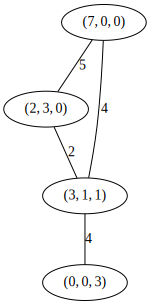

In [92]:
JupyterSplashDot(DotEliahouGraph(Factorizations(21,s)));

We know that $((7,0,0),(0,0,3))\in \ker\varphi_S$, and we want to see how can we obtain this pair from the minimal relations of $S$. Both $(7,0,0)$ and $(0,0,3)$ are in the same $R$-class. We can, instance, connect them with the sequence $(7,0,0)$, $(3,1,1)$, $(0,0,3)$. By transitivity, if we find a chain of trades going from  $(7,0,0)$  to $(3,1,1))$ and another from $(3,1,1)$ to $(0,0,3)$, by joining them we will find a chain from $(7,0,0)$ to $(0,0,3)$. 

By removing the common part of $(7,0,0)$ and $(3,1,1)$, we obtain $(4,0,0)$ and $(0,1,1)$, and the pair $((4,0,0),(0,1,1))$ is in our minimal presentation. We do the same with $(3,1,1)$ and $(0,0,3)$, obtaining $(3,1,0)$ and $(0,0,2)$, and $((0,0,2),(3,1,0))$ is in our minimal presentation. Let $\sigma=\ker\varphi_S$. Then $(7,0,0)=((4,0,0)+(3,0,0))\sigma ((0,1,1)+(3,0,0))=(3,1,1)\sigma ((3,1,0)+(0,0,1))\sigma ((0,0,2)+(0,0,1))=(0,0,3)$.

In this construction, elements with more than one $R$-class are crucial. These elements are called Betti elements (or degrees) of $S$.

In [93]:
bs:=BettiElements(s);

[ 10, 12, 14 ]

In [94]:
List(bs,b-> RClassesOfSetOfFactorizations(Factorizations(b,s)));

[ [ [ [ 0, 2, 0 ] ], [ [ 1, 0, 1 ] ] ], [ [ [ 4, 0, 0 ] ], [ [ 0, 1, 1 ] ] ], [ [ [ 3, 1, 0 ] ], [ [ 0, 0, 2 ] ] ] ]

It is not hard to prove that if $s\in S$ is a Betti element, then $s=n_i+w$ with $i>2$ and $w\in \operatorname{Ap}(S,n_1)$. Thus the number of Betti elements is finite. As a consequence of this, all minimal presentations have the same cardinality, since we only need relations "connecting" different $R$-classes of the factorizations of the Betti elements of $s$. This also provides a way do determine all minimal relations of a numerical semigroup (up to symmetry).

In [95]:
AllMinimalRelationsOfNumericalSemigroup(s);

[ [ [ 1, 0, 1 ], [ 0, 2, 0 ] ], [ [ 3, 1, 0 ], [ 0, 0, 2 ] ], [ [ 4, 0, 0 ], [ 0, 1, 1 ] ] ]

Minimal presentations of numerical semigroups with embedding dimension two have cardinality one. Thos for embedding dimension three have cardinality two or three. There are numerical semigroups with embedding dimension four with arbitrarily large minimal presentations.

## Minimal presentations and binomial ideals

Let $S$ be a numerical semigroup minimally generated by $\{n_1,\dots,n_e\}$. Let $K$ be a field and $K[x_1,\dots,x_e]$ be the polynomial ring on the variables $x_1,\dots, x_e$ with coefficients in $K$. 

Let $t$ be another unknown. We can define the subring $K[S]=K[t^s :s \in S]=K[t^{n_1},dots,t^{n_e}]\subseteq K[t]$, which is known as the semigroup ring of $S$. Let $\psi_S:K[x_1,\dots,x_e]\to K[t]$ be the unique ring homomorphism determined by $\psi_S(x_i)=t^{n_i}$. 

For $a=(a_1,\dots,a_e)\in \mathbb{N}^e$, write $x^a=x_1^{a_1}\cdots x_e^{a_e}$. Clearly, $\psi_S(x^a)=t^{\phi_S(a)}$, and consequently whenever $(a,b)\in \ker \psi_S$, we have that $x^a-x^b\in \ker \psi_S$. It is not hard to prove that 
$$
\ker \psi_S = \langle X^a - x^b : (a,b)\in \ker \phi_S\rangle
$$
and that a set $\rho$ generates $\ker \phi_S$ as a congruence if and only if $\{ x^a-x^b : (a,b)\in \rho\}$ generates $\ker\psi_S$ as an ideal.

In [96]:
s:=NumericalSemigroup(3,5,7);;

In order to compute $\ker \psi_S$ we can use elimination in the following way.

In [100]:
x:=Indeterminate(Rationals,"x");;
y:=Indeterminate(Rationals,"y");;
z:=Indeterminate(Rationals,"z");;
t:=Indeterminate(Rationals,"t");;

We identify each variable to $t$ to the power of the corresponding minimal generator.

In [101]:
gens:=[x-t^3,y-t^5,z-t^7];;

Now, we eliminate the variable $t$.

In [102]:
gr:=GroebnerBasis(gens,EliminationOrdering([t]));

[ -t^3+x, -t^5+y, -t^7+z, x*t^2-y, x^2*t-z, -x^2+y*t, -x^3+z*t^2, x*y-z*t, -x*z+y^2, -x^4+y*z, -x^3*y+z^2, x^2*y^3-z^3, -x*y^5+z^4, y^7-z^5 ]

In [103]:
gensi:=Filtered(gr, g->DegreeIndeterminate(g,t)=0);

[ -x*z+y^2, -x^4+y*z, -x^3*y+z^2, x^2*y^3-z^3, -x*y^5+z^4, y^7-z^5 ]

Next, we extract the exponents of the binomials obtained.

In [105]:
ed:=3;;
bintopair:=function(pp)
    local m1,m2, d1, d2, p;
    p:=pp/LeadingCoefficientOfPolynomial(pp,MonomialLexOrdering());
    m1:=LeadingMonomialOfPolynomial(p, MonomialLexOrdering());
    m2:=m1-p;
    d1:=List([1..ed], i->DegreeIndeterminate(m1,i));;
    d2:=List([1..ed], i->DegreeIndeterminate(m2,i));;
    return Set([d1,d2]);
end;

function( pp ) ... end

In [106]:
rho:=List(gensi,bintopair);

[ [ [ 0, 2, 0 ], [ 1, 0, 1 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ], [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 0, 3 ], [ 2, 3, 0 ] ], [ [ 0, 0, 4 ], [ 1, 5, 0 ] ], [ [ 0, 0, 5 ], [ 0, 7, 0 ] ] ]

The resulting set does not have to be minimal in general. We can detect those factorizations that correspond to Betti elements.

In [107]:
betticand:=Set(rho, p->p[1]*MinimalGenerators(s));

[ 10, 12, 14, 21, 28, 35 ]

In [108]:
betti:=Filtered(betticand, b->Length(RClassesOfSetOfFactorizations(Factorizations(b,s)))>1);

[ 10, 12, 14 ]

In [109]:
List(betti, b->RClassesOfSetOfFactorizations(Factorizations(b,s)));

[ [ [ [ 0, 2, 0 ] ], [ [ 1, 0, 1 ] ] ], [ [ [ 4, 0, 0 ] ], [ [ 0, 1, 1 ] ] ], [ [ [ 3, 1, 0 ] ], [ [ 0, 0, 2 ] ] ] ]

## Length based factorization invariants

Let $S$ be minimally generated by $\{n_1,\dots,n_e\}$. Recall that the set of factorizations of an element $s\in S$ is $\mathsf{Z}(s)=\varphi_S^{-1}(s)$, that is, 
$$ \mathsf{Z}(s)=\{ (a_1,\dots,a_e)\in \mathbb{N}^e : a_1n_1+\dots+a_en_e =s\}.$$

### Sets of lengths of factorizations

The length of a factorization $z=(z_1,\dots,z_e)$ is the number of minimal generators involved in it, that is, $|z|=z_1+\dots+z_e$. We define the set of lenghts of the factorizations of $s$ as 
$$ \mathsf{L}(s)= \{ |z| : z\in \mathsf{Z}(s)\}.$$

In [110]:
s:=NumericalSemigroup(3,5,7);;

In [111]:
LengthsOfFactorizationsElementWRTNumericalSemigroup(200,s);

[ 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66 ]

### Delta sets

One can arrange the lengths of the factorizations of an element $s$ in the following way $\mathsf{L}(s)=\{l_1<\dots<l_t\}$. The Delta set of $s$ is then defined as $\Delta(s)=\{l_2-l_1,l_3-l_2,\dots, l_t-l_{t-1}\}$. 

In [112]:
DeltaSet(200,s);

[ 2 ]

The Delta set of $S$ is the union of all the delta sets of its elements.

In [113]:
DeltaSet(s);

[ 2 ]

Recall that a minimal presentation of $s$ was 

In [114]:
rho:=MinimalPresentation(s);

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ], [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

And that one can "walk" from a factorization to any other factorization of the same element by using this minimal relations.

In [115]:
Set(rho, p->AbsInt(Sum(p[1]-p[2])));

[ 0, 2 ]

So it comes as no surprise that $\Delta(S)=\{2\}$. 
In fact, it is not difficult to prove $\min(\Delta(S))=\gcd\{ |a-b| : (a,b)\in \sigma\}$, with $\sigma$ any minimal presentation of $S$, and that $\max(\Delta(S))=\max\{\Delta(b) : b\in \operatorname{Betti}(S)\}$.

The idea behing the minimum is that any possible "jump" will be a linear combination of the "jumps" in the minimal relations. As for the maximum, "jumps" are preserved under translations, and thus the largest "jump" will be achieved between two factorizations with no commom support and in a Betti element.  

The structure of $\Delta(S)$ is very well known when $S$ has embedding dimension two or three, and even when it is generated by an arithmetice sequence.

### The elasticity

The elasticity of the factorizations of an element $s$ in a numerical semigroup $S$ is ratio between the largest length and smallest lenght of its factorizations, that is, 
$$
\rho(s)=\frac{\max(\mathsf{L}(s))}{\min(\mathsf{L}(s))}.
$$
The elasticity of the semigroup $S$ is defined as 
$$
\rho(S)=\sup\{ \rho(s) : s\in S\}.
$$

For numerical semigroups, this supremum becomes a maximum, and the elasticity is attained at the element $n_1 n_e$ (the product of the smallest generator times the largest generator).


In [116]:
Elasticity(100,s);

2

In [117]:
Elasticity(s);

7/3

In [118]:
Elasticity(3*7,s);

7/3

## Distance based factorization invariants

Given $x=(x_1,\dots,x_e)$ and $y=(y_1,\dots,y_e)$ in $\mathbb{N}^e$, their "common part" is
$$
x\wedge y = (\min\{x_1,y_1\},\dots,\min\{x_e,y_e\}),
$$
and the distance between $x$ and $y$ as 
$$
\operatorname{d}(x,y)=\max\{|x-(x\wedge y)|, |y-(x\wedge y)|\}.
$$

In [2]:
s:=NumericalSemigroup(10,13,19,21);;

We have already used `DotEliahouGraph`, the labels of the edges are the distances between de factorizations they connect.

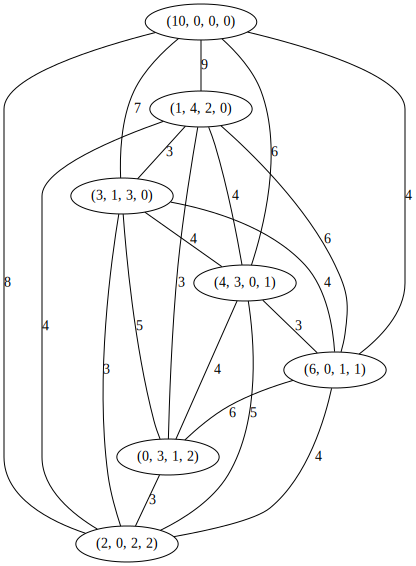

In [4]:
JupyterSplashDot(DotEliahouGraph(Factorizations(100,s)));

### The catenary degree

In addition, `DotFactorizationGraph` draws a minimum spanning tree.

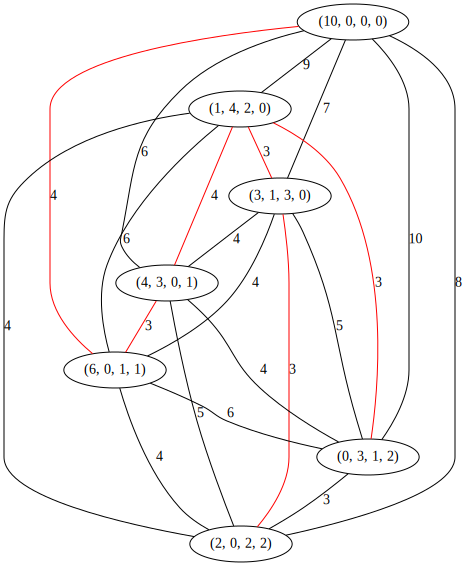

In [5]:
JupyterSplashDot(DotFactorizationGraph(Factorizations(100,s)));

In particular, this means that we can go from any factorization of $100$ in $S$ to any other factorization of the same element by using a path such that two consecutive nodes are at a distance of at most four. This is precisely the idea behind the concept of catenary degree.

Let $z$ and $z'$ be two factorizations of $s$. An $N$-chain joining $z$ and $z'$ is a sequence $z_1,\dots,z_t$ of factorizations of $s$ such that $\operatorname{d}(z_i,z_{i+1})\le N$. The catenary degree of $s$, denoted $\operatorname{c}(s)$, in the minimum $N$ such that for any two factorizations of $s$ there exists an $N$-chain connecting them.

The catenary degree of $S$ is 
$$
\operatorname{c}(S)=\sup\{ \operatorname{c}(s) : s\in S\}.
$$

This supremum is a maximum.

In [6]:
CatenaryDegree(100,s);

4

In [7]:
CatenaryDegree(s);

4

Recall that by using the minimal relations of $S$ we can find a path joining any two different factorizations of an element. Thus, it is not hard to prove that the maximum of the catenary degree of $S$ is attained at one of its Betti elements.

In [8]:
Set(BettiElements(s), b->CatenaryDegree(b,s));

[ 3, 4 ]

### The tame degree

The catenary degree measures the minimum distance needed to find paths connecting any two factorizations of an element in the semigroup in such a way that every step in the path is withing that minimum distance.

The tame degree intends to measure a radius $r$ in which for any factorization $z$ of $s\in S$, with $s-n_i\in S$, you will find another factorization $z'$ such that $\operatorname{d}(z,z')\le r$ and $z_i'\neq 0$.

Let $s\in S$ such that $s-n_i\in S$ for some $i\in\{1,\dots,e\}$. Define $\mathsf{Z}_i(s)=\{z : z\in \mathsf{Z}(s), z_i\neq 0\}$, which is nonempty as $s-n_i\in S$. Set
$$
\operatorname{t}_i(s)=\sup\{\operatorname{d}(z,\mathsf{Z}_i(s)) : z \in \mathsf{Z}(n)\},
$$
and 
$$
\operatorname{t}(s)=\max\{\operatorname{t}_i(s) : s-n_i\in S, i\in\{1,\dots,e\}\}.
$$

The tame degree of $S$ is defined as 
$$
\operatorname{t}(S)=\sup\{ \operatorname{t}(s) : s\in S\}.
$$

In [37]:
s:=NumericalSemigroup( 24, 59, 114);

Numerical semigroup with 3 generators

In [38]:
TameDegree(s);

29

Usually the tame degre is not attained at the Betti elements.

In [40]:
Set(BettiElements(s),b->TameDegree(b,s));

[ 11, 19 ]

It can be shown that the tame degree of $S$ is attained at an element $s\in S$ such that $s$ has a factorization in $\operatorname{Minimals}_\le (\mathsf{Z}(n_i+S))$ for some $i\in\{1,\dots,e\}$. Elements having this property are of the form $n_i+w$ with $w\in \operatorname{Ap}(S,n_j)$, more specifically, there exists $i,j\in \{1,\dots,e\}$ such that $s-n_i,s-n_j\in S$ and $s-(n_i+n_j)\not\in S$. 

For $s\in S$, the Rosales graph $G_s$ is defined as follows. The vertices of $G_s$ are the minimal generators $n_i$ such that $s-n_i\in S$, and $n_in_j$ is an edge whenever $s-(n_i+n_j)\in S$.

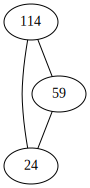

In [44]:
JupyterSplashDot(DotRosalesGraph(400,s));

In [45]:
BettiElements(s);

[ 354, 456 ]

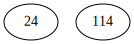

In [46]:
JupyterSplashDot(DotRosalesGraph(456,s));

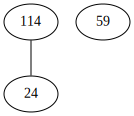

In [47]:
JupyterSplashDot(DotRosalesGraph(354,s));

The number of connected components of $G_s$ coincides with the set of $R$-classes of the set of factorizations of $s$. Thus the catenary degree is attained in an $s$ with $G_s$ not connected, and the tame degree in an $s$ with $G_s$ not complete.

### Primality

Recall that $S$ induces an order over the integers $a\le_S b$ if $b-a\in S$. If $a$ and $b$ are in $S$, then we say that $a$ divides $b$ if $b-a\in S$. In this way, minimal generators (irreducibles, atoms, primitive elements) are those not having proper divisors. A natural question arises: are there "prime" elements in a numerical semigroup. The ones to be candidates to be prime are the minimal generators of the semigroup.

Let $S$ be minimally generated by $\{n_1,\dots,n_e\}$. Consider the set $\operatorname{Minimals}_\le (\mathsf{Z}(n_i+S))$. Notice that $S\setminus(n_i+S)=\operatorname{Ap}(S,n_i)$, and so the set $\mathsf{Z}(n_i+S)=\mathbb{N^e}\setminus \mathsf{Z}(\operatorname{Ap}(S,n_i))$. Let $z \in \operatorname{Minimals}_\le (\mathsf{Z}(n_i+S))$, $z\neq e_i$. Then $n_i$ divides $\varphi_S(z)$ and cannot divide any of its "factors". Hence, $n_i$ cannot be prime.

Let $s\in S$. The $\omega$-primality of $S$, $\omega(S,s)$, is defined as the least integer $N$ such that whenever $s$ divides $a_1+\dots+a_n$ for some $a_1,\dots,a_n\in S$, then $s$ divides $a_{i_1}+\dots+a_{i_N}$ for some $\{i_1,\dots,i_N\}\subseteq \{1,\dots,n\}$. By an argument similar to the one given above,
$$
\omega(S,s)= \max \{ |z| : z\in \operatorname{Minimals}_\le (\mathsf{Z}(s+S))\}.
$$

In [48]:
s:=NumericalSemigroup(3,5,7);

Numerical semigroup with 3 generators

In [49]:
OmegaPrimality(10,s);

5

Observe that if $z\in \operatorname{Minimals}_\le(\mathsf{Z}(s+S))$, then $\varphi(z)=s+t$ for some $t\in S$. Let $i$ be such $z_i\neq 0$. Then $z-z_i\not\in \mathsf{Z}(s+S)$, and thus $s+t-n_i\not\in s+S$, which means that $t\in \operatorname{Ap}(S,n_i)$. This bounds the search for cmputing $\operatorname{Minimals}_\le(\mathsf{Z}(s+S))$.

There is an alternative way to compute the set $\operatorname{Minimals}_\le(\mathsf{Z}(s+S))$. Observe that $x\in \mathsf{Z}(s+S)$ if an only if $n_1x_1+\dots+x_en_e=s+n_1t_1+\dots+n_et_e$ for some $t_1,\dots,t_e\in \mathbb{N}$. So we can solve the problem by looking at the nonnegative integer solutions (in $\mathbb{N}^{2e}$ to the equation
$$n_1x_1+\dots+x_en_e-n_1t_1-\dots-n_et_e=s$$
and then project onto the first $e$ coordinates.

The omega primality of $S$ is defined as the maximum of the omega primalities of its minimal generators.

In [50]:
OmegaPrimality(s);

4

It can be shown that 
$$
2+\max(\delta(S))\le \operatorname{c}(S)\le \omega(S)\le \operatorname{t}(S).
$$

### Divisors

Let $s$ be an element in a numerical semigroup $S$. The set of divisors of $s$ is 
$$
\operatorname{D}(s)=\{ n\in S : s-n\in S\}.
$$

The Feng-Rao distance of $s$ is defined as 
$$
\delta_{FR}(s)=\min\{ \# \operatorname{D}(s') : s\le s', s'\in S\}.
$$

Let $c$ be the conductor of $S$ and let $g$ be its genus. It can be shown that for $s\ge 2c-1$, 
$$
\delta_{FR}(s)=s+1-2g.
$$

In [53]:
ndiv:={x,s}->Length(DivisorsOfElementInNumericalSemigroup(x,s));;
s:=NumericalSemigroup(3,5,7);;
List(s{[1..20]}, x->ndiv(x,s));

[ 1, 2, 2, 3, 2, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 ]

In [55]:
FengRaoDistance(s,1,10);

5

The generalized Feng-Rao distance is defined as 
$$
\delta_{FR}^r=\min\{\#\operatorname{D}(s_1,\dots,s_r) : s\le s_1\le \dots \le s_r, s_1,\dots,s_r\in S\},
$$
where $\operatorname{D}(s_1,\dots,s_r)=\bigcup_{i=1}^r \operatorname{D}(s_i)$.
It can be shown that for $s\ge 2c-1$, 
$$
\delta_{FR}^r= s+1 -2g + E(S,r).
$$
The constant $E(S,r)$ is known as the $r$th Feng-Rao number. For $r=2$, 
$$
E(S,2)=\min\{\#\operatorname{Ap}(S,n) : r\in \{1,\dots,\operatorname{m}(S)\}\}.
$$
The definition of the Apéry set for elements not in $S$ is the same as the one given above.